# SNN_1

This code builds on SNN_0 and takes real input from an image.  Initially this will be images from the MNIST dataset, a number picked at random (eventually!) to understand the propogration of spikes across layers in an SNN.

It aims to demonstrate/prove the following:

* A more complex input can be processed (rather than a flat network of circa 100 neurons in SNN_0)
* A higher stimulus will propogate quicker across the network (more spikes are generated, so they will have a bigger impact on neurons in higher layers)


## Running the simulation

The following code defines a set of LIF neurons and applies a stimulus to them. It then propogates the spikes to a neuron in a 2nd layer, graphing the results.

Note that some of the code from SNN_0 (such as the class LIFNeuron) has been lifted into seperate Python packages to improve readability and re-use across notebooks.

### Set up the environment

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from neurons import LIFNeuron as LIF
from utils import graph_results as graph
from mnist import MNIST 
%matplotlib inline

###  Set up some parameters for the simulation

* Assume a consistent/single stimulus value for now that is applied for the duration of the simulation.
* Define the architecture of the SNN (layers, neurons per layer)

In [24]:
T         = 20   #50    # total time to sumulate (msec)
dt        = 0.0125 # Simulation timestep
time      = int(T / dt)

debug=True

### Get an MNIST image

Start by getting an image from the MNIST dataset and render it

In [25]:
mndata = MNIST('./mnist')
images, labels = mndata.load_training()

def get_next_image(index=0):
    return images[index]
    
image = get_next_image(index=0)
print(mndata.display(image))


............................
............................
............................
............................
............................
.....................@@.....
.............@@@@@@.@@......
........@@@@@@@@@@..........
........@@@@@@..@@..........
...........@@@..............
............@...............
............@...............
.............@..............
.............@@.............
..............@@@...........
................@@..........
.................@@.........
.................@@@........
.................@@@........
..............@@@@@.........
............@@@@@@..........
..........@@@@@.............
........@@@@@...............
......@@@@@@................
.....@@@@...................
............................
............................
............................


Now convert to a Numpy array, normalise (into 0<=image<=1) for easier processing

In [26]:
image=np.asarray(image).reshape((28,28))
image_norm = (image * 255.0/image.max()) / 255.
print(image_norm)
print(image.shape)

[[ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.        

Create a set of kernels for the image (assume a basic convolution will happen later)

In [27]:
stride = (4,2)   # TODO: This will be 4 on-centre neurons, 2 surround (off-centre) neurons
stride_size = stride[0] + stride[1]
len_x, len_y = image.shape
x_max = int(len_x/stride[0])
y_max = int(len_y/stride[0])
print ('Convolution Dimensions: x={} / y={}'.format(x_max, y_max))  #', starting at x={}, y={}'.format(x_max, y_max, x_count, y_count))

Convolution Dimensions: x=7 / y=7


Render the image in each of it's retinal 'zones'

This will be the basis of what each retinal unit views as we progress.

Not that the pixels that will have the strongest stimuli are white (as they are closer to 1), areas of least stimuli are black (value close to 0).

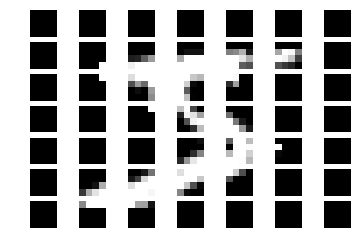

In [28]:
fig = plt.figure() #int(x_max+1) * int(y_max+1))
x_count, y_count = 1, 1

for y in range (0, len_y, stride[0]):
    x_count = 1
    for x in range(0, len_x, stride[0]):
        x_end = x + stride[0]
        y_end = y + stride[0]
        kernel = image_norm[y:y_end, x:x_end]
        #orientation = s1(kernel)
        a = fig.add_subplot(y_max, x_max, (y_count-1)*x_max+x_count)
        a.axis('off')
        plt.imshow(kernel, cmap="gray")    
        x_count += 1
    y_count += 1
plt.show()    

### Process the pixel stimulus for each retinal neuron

Process the image 1 pixel at a time

First create a set of neurons for each of the pixels. 
Assume 1-to-1 mapping, and no concept of a retinal unit. This will come later.

In [29]:
neurons = []
print('Creating {} x {} neurons'.format(len_x, len_y))
for y in range (0, len_y, 1):
    neuron_row=[]
    for x in range(0, len_x, 1):
        print('Creating neuron y={}/x={}'.format(y,x))
        neuron_row.append(LIF.LIFNeuron(neuron_label="{}/{}".format(y,x), debug=debug))
    neurons.append(neuron_row)

Creating 28 x 28 neurons
Creating neuron y=0/x=0
LIFNeuron(0/0): Created Leaky Integrate and Fire neuron starting at time 0
Creating neuron y=0/x=1
LIFNeuron(0/1): Created Leaky Integrate and Fire neuron starting at time 0
Creating neuron y=0/x=2
LIFNeuron(0/2): Created Leaky Integrate and Fire neuron starting at time 0
Creating neuron y=0/x=3
LIFNeuron(0/3): Created Leaky Integrate and Fire neuron starting at time 0
Creating neuron y=0/x=4
LIFNeuron(0/4): Created Leaky Integrate and Fire neuron starting at time 0
Creating neuron y=0/x=5
LIFNeuron(0/5): Created Leaky Integrate and Fire neuron starting at time 0
Creating neuron y=0/x=6
LIFNeuron(0/6): Created Leaky Integrate and Fire neuron starting at time 0
Creating neuron y=0/x=7
LIFNeuron(0/7): Created Leaky Integrate and Fire neuron starting at time 0
Creating neuron y=0/x=8
LIFNeuron(0/8): Created Leaky Integrate and Fire neuron starting at time 0
Creating neuron y=0/x=9
LIFNeuron(0/9): Created Leaky Integrate and Fire neuron star

In [30]:
start_x = 5
start_y = 5

print(len_x, len_y)

28 28


In [31]:
#for y in range(0, len_y, start_y + stride_size, 1):
#    for x in range(start_x, start_x + stride_size, 1):
for y in range(0, len_y, 1):
    for x in range(0, len_x, 1):
        stimulus = np.full((time), image_norm[y,x])
        print('Stimulus from image @ {}/{}: {}'.format(y, x, stimulus))
        print('Processing spike generator for neuron {}/{}: {}'.format(y,x,neurons[y][x].neuron_label))
        neurons[y][x].spike_generator(stimulus)
        print('Stats for neuron {},{}: time={}, stimulus={}, spikes={}' \
              .format(x,y,time, stimulus.shape, neurons[y][x].spikes)) #.shape))
        #graph.plot_membrane_potential(neurons[neuron_x][neuron_y].time, neurons[neuron_x][neuron_y].Vm, 'Membrane Potential {}'.format(neurons[neuron_x][neuron_y].type), neuron_id = "{}/{}".format(neuron_x, neuron_y))
        #graph.plot_spikes(neurons[neuron_x][neuron_y].time, neurons[neuron_x][neuron_y].spikes, 'Output spikes for {}'.format(neurons[neuron_x][neuron_y].type), neuron_id = "{}/{}".format(neuron_x, neuron_y))

Stimulus from image @ 0/0: [ 0.  0.  0. ...,  0.  0.  0.]
Processing spike generator for neuron 0/0: 0/0
LIFNeuron.spike_generator(0/0).initial_state(input=(1600,), duration=1600, initial Vm=0.0, t=0, debug=True)
LIFNeuron.spike_generator(0/0).exit_state(Vm=(1601,) at iteration i=1599, time=200.0)
Stats for neuron 0,0: time=1600, stimulus=(1600,), spikes=[ 0.  0.  0. ...,  0.  0.  0.]
Stimulus from image @ 0/1: [ 0.  0.  0. ...,  0.  0.  0.]
Processing spike generator for neuron 0/1: 0/1
LIFNeuron.spike_generator(0/1).initial_state(input=(1600,), duration=1600, initial Vm=0.0, t=0, debug=True)
LIFNeuron.spike_generator(0/1).exit_state(Vm=(1601,) at iteration i=1599, time=200.0)
Stats for neuron 1,0: time=1600, stimulus=(1600,), spikes=[ 0.  0.  0. ...,  0.  0.  0.]
Stimulus from image @ 0/2: [ 0.  0.  0. ...,  0.  0.  0.]
Processing spike generator for neuron 0/2: 0/2
LIFNeuron.spike_generator(0/2).initial_state(input=(1600,), duration=1600, initial Vm=0.0, t=0, debug=True)
LIFNeuron.s

Processing spike generator for neuron 1/10: 1/10
LIFNeuron.spike_generator(1/10).initial_state(input=(1600,), duration=1600, initial Vm=0.0, t=0, debug=True)
LIFNeuron.spike_generator(1/10).exit_state(Vm=(1601,) at iteration i=1599, time=200.0)
Stats for neuron 10,1: time=1600, stimulus=(1600,), spikes=[ 0.  0.  0. ...,  0.  0.  0.]
Stimulus from image @ 1/11: [ 0.  0.  0. ...,  0.  0.  0.]
Processing spike generator for neuron 1/11: 1/11
LIFNeuron.spike_generator(1/11).initial_state(input=(1600,), duration=1600, initial Vm=0.0, t=0, debug=True)
LIFNeuron.spike_generator(1/11).exit_state(Vm=(1601,) at iteration i=1599, time=200.0)
Stats for neuron 11,1: time=1600, stimulus=(1600,), spikes=[ 0.  0.  0. ...,  0.  0.  0.]
Stimulus from image @ 1/12: [ 0.  0.  0. ...,  0.  0.  0.]
Processing spike generator for neuron 1/12: 1/12
LIFNeuron.spike_generator(1/12).initial_state(input=(1600,), duration=1600, initial Vm=0.0, t=0, debug=True)
LIFNeuron.spike_generator(1/12).exit_state(Vm=(1601,) 

LIFNeuron.spike_generator(3/5).exit_state(Vm=(1601,) at iteration i=1599, time=200.0)
Stats for neuron 5,3: time=1600, stimulus=(1600,), spikes=[ 0.  0.  0. ...,  0.  0.  0.]
Stimulus from image @ 3/6: [ 0.  0.  0. ...,  0.  0.  0.]
Processing spike generator for neuron 3/6: 3/6
LIFNeuron.spike_generator(3/6).initial_state(input=(1600,), duration=1600, initial Vm=0.0, t=0, debug=True)
LIFNeuron.spike_generator(3/6).exit_state(Vm=(1601,) at iteration i=1599, time=200.0)
Stats for neuron 6,3: time=1600, stimulus=(1600,), spikes=[ 0.  0.  0. ...,  0.  0.  0.]
Stimulus from image @ 3/7: [ 0.  0.  0. ...,  0.  0.  0.]
Processing spike generator for neuron 3/7: 3/7
LIFNeuron.spike_generator(3/7).initial_state(input=(1600,), duration=1600, initial Vm=0.0, t=0, debug=True)
LIFNeuron.spike_generator(3/7).exit_state(Vm=(1601,) at iteration i=1599, time=200.0)
Stats for neuron 7,3: time=1600, stimulus=(1600,), spikes=[ 0.  0.  0. ...,  0.  0.  0.]
Stimulus from image @ 3/8: [ 0.  0.  0. ...,  0. 

Stats for neuron 24,4: time=1600, stimulus=(1600,), spikes=[ 0.  0.  0. ...,  0.  0.  0.]
Stimulus from image @ 4/25: [ 0.  0.  0. ...,  0.  0.  0.]
Processing spike generator for neuron 4/25: 4/25
LIFNeuron.spike_generator(4/25).initial_state(input=(1600,), duration=1600, initial Vm=0.0, t=0, debug=True)
LIFNeuron.spike_generator(4/25).exit_state(Vm=(1601,) at iteration i=1599, time=200.0)
Stats for neuron 25,4: time=1600, stimulus=(1600,), spikes=[ 0.  0.  0. ...,  0.  0.  0.]
Stimulus from image @ 4/26: [ 0.  0.  0. ...,  0.  0.  0.]
Processing spike generator for neuron 4/26: 4/26
LIFNeuron.spike_generator(4/26).initial_state(input=(1600,), duration=1600, initial Vm=0.0, t=0, debug=True)
LIFNeuron.spike_generator(4/26).exit_state(Vm=(1601,) at iteration i=1599, time=200.0)
Stats for neuron 26,4: time=1600, stimulus=(1600,), spikes=[ 0.  0.  0. ...,  0.  0.  0.]
Stimulus from image @ 4/27: [ 0.  0.  0. ...,  0.  0.  0.]
Processing spike generator for neuron 4/27: 4/27
LIFNeuron.spik

*** LIFNeuron.spike_generator(6/18).spike=(self.t_rest=183.0, self.t=179.0, self.tau_ref=4)
LIFNeuron.spike_generator(6/18).exit_state(Vm=(1601,) at iteration i=1599, time=200.0)
Stats for neuron 18,6: time=1600, stimulus=(1600,), spikes=[ 0.  0.  0. ...,  0.  0.  0.]
Stimulus from image @ 6/19: [ 0.6745098  0.6745098  0.6745098 ...,  0.6745098  0.6745098  0.6745098]
Processing spike generator for neuron 6/19: 6/19
LIFNeuron.spike_generator(6/19).initial_state(input=(1600,), duration=1600, initial Vm=0.0, t=0, debug=True)
LIFNeuron.spike_generator(6/19).exit_state(Vm=(1601,) at iteration i=1599, time=200.0)
Stats for neuron 19,6: time=1600, stimulus=(1600,), spikes=[ 0.  0.  0. ...,  0.  0.  0.]
Stimulus from image @ 6/20: [ 0.99215686  0.99215686  0.99215686 ...,  0.99215686  0.99215686
  0.99215686]
Processing spike generator for neuron 6/20: 6/20
LIFNeuron.spike_generator(6/20).initial_state(input=(1600,), duration=1600, initial Vm=0.0, t=0, debug=True)
*** LIFNeuron.spike_generator

Stimulus from image @ 8/2: [ 0.  0.  0. ...,  0.  0.  0.]
Processing spike generator for neuron 8/2: 8/2
LIFNeuron.spike_generator(8/2).initial_state(input=(1600,), duration=1600, initial Vm=0.0, t=0, debug=True)
LIFNeuron.spike_generator(8/2).exit_state(Vm=(1601,) at iteration i=1599, time=200.0)
Stats for neuron 2,8: time=1600, stimulus=(1600,), spikes=[ 0.  0.  0. ...,  0.  0.  0.]
Stimulus from image @ 8/3: [ 0.  0.  0. ...,  0.  0.  0.]
Processing spike generator for neuron 8/3: 8/3
LIFNeuron.spike_generator(8/3).initial_state(input=(1600,), duration=1600, initial Vm=0.0, t=0, debug=True)
LIFNeuron.spike_generator(8/3).exit_state(Vm=(1601,) at iteration i=1599, time=200.0)
Stats for neuron 3,8: time=1600, stimulus=(1600,), spikes=[ 0.  0.  0. ...,  0.  0.  0.]
Stimulus from image @ 8/4: [ 0.  0.  0. ...,  0.  0.  0.]
Processing spike generator for neuron 8/4: 8/4
LIFNeuron.spike_generator(8/4).initial_state(input=(1600,), duration=1600, initial Vm=0.0, t=0, debug=True)
LIFNeuron.s

*** LIFNeuron.spike_generator(9/12).spike=(self.t_rest=36.25, self.t=32.25, self.tau_ref=4)
*** LIFNeuron.spike_generator(9/12).spike=(self.t_rest=54.375, self.t=50.375, self.tau_ref=4)
*** LIFNeuron.spike_generator(9/12).spike=(self.t_rest=72.5, self.t=68.5, self.tau_ref=4)
*** LIFNeuron.spike_generator(9/12).spike=(self.t_rest=90.625, self.t=86.625, self.tau_ref=4)
*** LIFNeuron.spike_generator(9/12).spike=(self.t_rest=108.75, self.t=104.75, self.tau_ref=4)
*** LIFNeuron.spike_generator(9/12).spike=(self.t_rest=126.875, self.t=122.875, self.tau_ref=4)
*** LIFNeuron.spike_generator(9/12).spike=(self.t_rest=145.0, self.t=141.0, self.tau_ref=4)
*** LIFNeuron.spike_generator(9/12).spike=(self.t_rest=163.125, self.t=159.125, self.tau_ref=4)
*** LIFNeuron.spike_generator(9/12).spike=(self.t_rest=181.25, self.t=177.25, self.tau_ref=4)
*** LIFNeuron.spike_generator(9/12).spike=(self.t_rest=199.375, self.t=195.375, self.tau_ref=4)
LIFNeuron.spike_generator(9/12).exit_state(Vm=(1601,) at itera

*** LIFNeuron.spike_generator(11/12).spike=(self.t_rest=145.0, self.t=141.0, self.tau_ref=4)
*** LIFNeuron.spike_generator(11/12).spike=(self.t_rest=163.125, self.t=159.125, self.tau_ref=4)
*** LIFNeuron.spike_generator(11/12).spike=(self.t_rest=181.25, self.t=177.25, self.tau_ref=4)
*** LIFNeuron.spike_generator(11/12).spike=(self.t_rest=199.375, self.t=195.375, self.tau_ref=4)
LIFNeuron.spike_generator(11/12).exit_state(Vm=(1601,) at iteration i=1599, time=200.0)
Stats for neuron 12,11: time=1600, stimulus=(1600,), spikes=[ 0.  0.  0. ...,  0.  0.  0.]
Stimulus from image @ 11/13: [ 0.74509804  0.74509804  0.74509804 ...,  0.74509804  0.74509804
  0.74509804]
Processing spike generator for neuron 11/13: 11/13
LIFNeuron.spike_generator(11/13).initial_state(input=(1600,), duration=1600, initial Vm=0.0, t=0, debug=True)
LIFNeuron.spike_generator(11/13).exit_state(Vm=(1601,) at iteration i=1599, time=200.0)
Stats for neuron 13,11: time=1600, stimulus=(1600,), spikes=[ 0.  0.  0. ...,  0.

Processing spike generator for neuron 13/15: 13/15
LIFNeuron.spike_generator(13/15).initial_state(input=(1600,), duration=1600, initial Vm=0.0, t=0, debug=True)
LIFNeuron.spike_generator(13/15).exit_state(Vm=(1601,) at iteration i=1599, time=200.0)
Stats for neuron 15,13: time=1600, stimulus=(1600,), spikes=[ 0.  0.  0. ...,  0.  0.  0.]
Stimulus from image @ 13/16: [ 0.42352941  0.42352941  0.42352941 ...,  0.42352941  0.42352941
  0.42352941]
Processing spike generator for neuron 13/16: 13/16
LIFNeuron.spike_generator(13/16).initial_state(input=(1600,), duration=1600, initial Vm=0.0, t=0, debug=True)
LIFNeuron.spike_generator(13/16).exit_state(Vm=(1601,) at iteration i=1599, time=200.0)
Stats for neuron 16,13: time=1600, stimulus=(1600,), spikes=[ 0.  0.  0. ...,  0.  0.  0.]
Stimulus from image @ 13/17: [ 0.00392157  0.00392157  0.00392157 ...,  0.00392157  0.00392157
  0.00392157]
Processing spike generator for neuron 13/17: 13/17
LIFNeuron.spike_generator(13/17).initial_state(inpu

LIFNeuron.spike_generator(15/7).initial_state(input=(1600,), duration=1600, initial Vm=0.0, t=0, debug=True)
LIFNeuron.spike_generator(15/7).exit_state(Vm=(1601,) at iteration i=1599, time=200.0)
Stats for neuron 7,15: time=1600, stimulus=(1600,), spikes=[ 0.  0.  0. ...,  0.  0.  0.]
Stimulus from image @ 15/8: [ 0.  0.  0. ...,  0.  0.  0.]
Processing spike generator for neuron 15/8: 15/8
LIFNeuron.spike_generator(15/8).initial_state(input=(1600,), duration=1600, initial Vm=0.0, t=0, debug=True)
LIFNeuron.spike_generator(15/8).exit_state(Vm=(1601,) at iteration i=1599, time=200.0)
Stats for neuron 8,15: time=1600, stimulus=(1600,), spikes=[ 0.  0.  0. ...,  0.  0.  0.]
Stimulus from image @ 15/9: [ 0.  0.  0. ...,  0.  0.  0.]
Processing spike generator for neuron 15/9: 15/9
LIFNeuron.spike_generator(15/9).initial_state(input=(1600,), duration=1600, initial Vm=0.0, t=0, debug=True)
LIFNeuron.spike_generator(15/9).exit_state(Vm=(1601,) at iteration i=1599, time=200.0)
Stats for neuron

Stimulus from image @ 16/16: [ 0.36470588  0.36470588  0.36470588 ...,  0.36470588  0.36470588
  0.36470588]
Processing spike generator for neuron 16/16: 16/16
LIFNeuron.spike_generator(16/16).initial_state(input=(1600,), duration=1600, initial Vm=0.0, t=0, debug=True)
LIFNeuron.spike_generator(16/16).exit_state(Vm=(1601,) at iteration i=1599, time=200.0)
Stats for neuron 16,16: time=1600, stimulus=(1600,), spikes=[ 0.  0.  0. ...,  0.  0.  0.]
Stimulus from image @ 16/17: [ 0.98823529  0.98823529  0.98823529 ...,  0.98823529  0.98823529
  0.98823529]
Processing spike generator for neuron 16/17: 16/17
LIFNeuron.spike_generator(16/17).initial_state(input=(1600,), duration=1600, initial Vm=0.0, t=0, debug=True)
*** LIFNeuron.spike_generator(16/17).spike=(self.t_rest=18.25, self.t=14.25, self.tau_ref=4)
*** LIFNeuron.spike_generator(16/17).spike=(self.t_rest=36.5, self.t=32.5, self.tau_ref=4)
*** LIFNeuron.spike_generator(16/17).spike=(self.t_rest=54.75, self.t=50.75, self.tau_ref=4)
*** 

Stats for neuron 11,18: time=1600, stimulus=(1600,), spikes=[ 0.  0.  0. ...,  0.  0.  0.]
Stimulus from image @ 18/12: [ 0.  0.  0. ...,  0.  0.  0.]
Processing spike generator for neuron 18/12: 18/12
LIFNeuron.spike_generator(18/12).initial_state(input=(1600,), duration=1600, initial Vm=0.0, t=0, debug=True)
LIFNeuron.spike_generator(18/12).exit_state(Vm=(1601,) at iteration i=1599, time=200.0)
Stats for neuron 12,18: time=1600, stimulus=(1600,), spikes=[ 0.  0.  0. ...,  0.  0.  0.]
Stimulus from image @ 18/13: [ 0.  0.  0. ...,  0.  0.  0.]
Processing spike generator for neuron 18/13: 18/13
LIFNeuron.spike_generator(18/13).initial_state(input=(1600,), duration=1600, initial Vm=0.0, t=0, debug=True)
LIFNeuron.spike_generator(18/13).exit_state(Vm=(1601,) at iteration i=1599, time=200.0)
Stats for neuron 13,18: time=1600, stimulus=(1600,), spikes=[ 0.  0.  0. ...,  0.  0.  0.]
Stimulus from image @ 18/14: [ 0.18039216  0.18039216  0.18039216 ...,  0.18039216  0.18039216
  0.18039216]


Stimulus from image @ 20/7: [ 0.  0.  0. ...,  0.  0.  0.]
Processing spike generator for neuron 20/7: 20/7
LIFNeuron.spike_generator(20/7).initial_state(input=(1600,), duration=1600, initial Vm=0.0, t=0, debug=True)
LIFNeuron.spike_generator(20/7).exit_state(Vm=(1601,) at iteration i=1599, time=200.0)
Stats for neuron 7,20: time=1600, stimulus=(1600,), spikes=[ 0.  0.  0. ...,  0.  0.  0.]
Stimulus from image @ 20/8: [ 0.  0.  0. ...,  0.  0.  0.]
Processing spike generator for neuron 20/8: 20/8
LIFNeuron.spike_generator(20/8).initial_state(input=(1600,), duration=1600, initial Vm=0.0, t=0, debug=True)
LIFNeuron.spike_generator(20/8).exit_state(Vm=(1601,) at iteration i=1599, time=200.0)
Stats for neuron 8,20: time=1600, stimulus=(1600,), spikes=[ 0.  0.  0. ...,  0.  0.  0.]
Stimulus from image @ 20/9: [ 0.  0.  0. ...,  0.  0.  0.]
Processing spike generator for neuron 20/9: 20/9
LIFNeuron.spike_generator(20/9).initial_state(input=(1600,), duration=1600, initial Vm=0.0, t=0, debug=T

LIFNeuron.spike_generator(21/23).exit_state(Vm=(1601,) at iteration i=1599, time=200.0)
Stats for neuron 23,21: time=1600, stimulus=(1600,), spikes=[ 0.  0.  0. ...,  0.  0.  0.]
Stimulus from image @ 21/24: [ 0.  0.  0. ...,  0.  0.  0.]
Processing spike generator for neuron 21/24: 21/24
LIFNeuron.spike_generator(21/24).initial_state(input=(1600,), duration=1600, initial Vm=0.0, t=0, debug=True)
LIFNeuron.spike_generator(21/24).exit_state(Vm=(1601,) at iteration i=1599, time=200.0)
Stats for neuron 24,21: time=1600, stimulus=(1600,), spikes=[ 0.  0.  0. ...,  0.  0.  0.]
Stimulus from image @ 21/25: [ 0.  0.  0. ...,  0.  0.  0.]
Processing spike generator for neuron 21/25: 21/25
LIFNeuron.spike_generator(21/25).initial_state(input=(1600,), duration=1600, initial Vm=0.0, t=0, debug=True)
LIFNeuron.spike_generator(21/25).exit_state(Vm=(1601,) at iteration i=1599, time=200.0)
Stats for neuron 25,21: time=1600, stimulus=(1600,), spikes=[ 0.  0.  0. ...,  0.  0.  0.]
Stimulus from image @

*** LIFNeuron.spike_generator(23/11).spike=(self.t_rest=154.0, self.t=150.0, self.tau_ref=4)
*** LIFNeuron.spike_generator(23/11).spike=(self.t_rest=173.25, self.t=169.25, self.tau_ref=4)
*** LIFNeuron.spike_generator(23/11).spike=(self.t_rest=192.5, self.t=188.5, self.tau_ref=4)
LIFNeuron.spike_generator(23/11).exit_state(Vm=(1601,) at iteration i=1599, time=200.0)
Stats for neuron 11,23: time=1600, stimulus=(1600,), spikes=[ 0.  0.  0. ...,  0.  0.  0.]
Stimulus from image @ 23/12: [ 0.52156863  0.52156863  0.52156863 ...,  0.52156863  0.52156863
  0.52156863]
Processing spike generator for neuron 23/12: 23/12
LIFNeuron.spike_generator(23/12).initial_state(input=(1600,), duration=1600, initial Vm=0.0, t=0, debug=True)
LIFNeuron.spike_generator(23/12).exit_state(Vm=(1601,) at iteration i=1599, time=200.0)
Stats for neuron 12,23: time=1600, stimulus=(1600,), spikes=[ 0.  0.  0. ...,  0.  0.  0.]
Stimulus from image @ 23/13: [ 0.04313725  0.04313725  0.04313725 ...,  0.04313725  0.04313

Stats for neuron 5,25: time=1600, stimulus=(1600,), spikes=[ 0.  0.  0. ...,  0.  0.  0.]
Stimulus from image @ 25/6: [ 0.  0.  0. ...,  0.  0.  0.]
Processing spike generator for neuron 25/6: 25/6
LIFNeuron.spike_generator(25/6).initial_state(input=(1600,), duration=1600, initial Vm=0.0, t=0, debug=True)
LIFNeuron.spike_generator(25/6).exit_state(Vm=(1601,) at iteration i=1599, time=200.0)
Stats for neuron 6,25: time=1600, stimulus=(1600,), spikes=[ 0.  0.  0. ...,  0.  0.  0.]
Stimulus from image @ 25/7: [ 0.  0.  0. ...,  0.  0.  0.]
Processing spike generator for neuron 25/7: 25/7
LIFNeuron.spike_generator(25/7).initial_state(input=(1600,), duration=1600, initial Vm=0.0, t=0, debug=True)
LIFNeuron.spike_generator(25/7).exit_state(Vm=(1601,) at iteration i=1599, time=200.0)
Stats for neuron 7,25: time=1600, stimulus=(1600,), spikes=[ 0.  0.  0. ...,  0.  0.  0.]
Stimulus from image @ 25/8: [ 0.  0.  0. ...,  0.  0.  0.]
Processing spike generator for neuron 25/8: 25/8
LIFNeuron.spik

### Sample a neuron to see how it behaves under stimulus from the image

In [39]:
nx, ny = 21, 5
print(neurons[ny][nx].time.shape)
print(neurons[ny][nx].spikes.shape)
print(neurons[ny][nx].Vm.shape)

(1601,)
(1601,)
(1601,)


In [40]:
print(neurons[ny][nx].neuron_label)

5/21


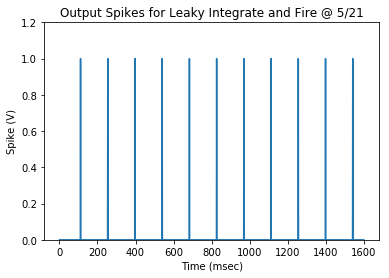

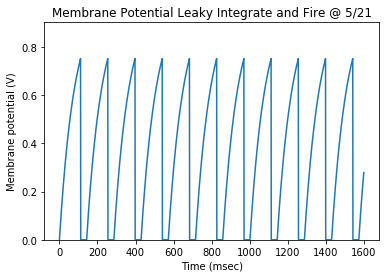

In [41]:
graph.plot_spikes(neurons[ny][nx].time, neurons[ny][nx].spikes, 
            'Output Spikes for {}'.format(neurons[ny][nx].type), neuron_id = '{}/{}'.format(ny, nx))
graph.plot_membrane_potential(neurons[ny][nx].time, neurons[ny][nx].Vm, 
            'Membrane Potential {}'.format(neurons[ny][nx].type), neuron_id = '{}/{}'.format(ny, nx))

## L2: Sum spikes into a neuron in the next layer

Create neurons in layer 2

In [42]:
l2_neurons_x = int(len_x / stride[0])
l2_neurons_y = int(len_y / stride[0])
print ('Creating layer 2 neurons: {} by {}'.format(l2_neurons_x, l2_neurons_y))
l2_neurons = []

for y in range(l2_neurons_y):
    l2_neuron_row = []
    for x in range(l2_neurons_x):
        l2_neuron_row.append(LIF.LIFNeuron(neuron_label="L2:{}/{}".format(y,x), debug=debug))
    l2_neurons.append(neuron_row)

Creating layer 2 neurons: 7 by 7
LIFNeuron(L2:0/0): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:0/1): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:0/2): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:0/3): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:0/4): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:0/5): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:0/6): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:1/0): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:1/1): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:1/2): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:1/3): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:1/4): Created Leaky Integrate and Fire neuron starting at time 0
LIFNeuron(L2:1/5): Created Leak

Now process by retinal unit (x:x+stride, y:y+stride) and propogate spikes into the 2nd layer

In [43]:
l2_neuron_stimulus = np.zeros((l2_neurons_x, l2_neurons_y, time))

In [44]:
mult_factor = 1           # Number of neurons for each pixel (this is a hack to reduce processing earlier,... 
                          # raise to 49 perhaps later!)
l2x, l2y = 0,0
for ry in range (0, len_y, stride[0]):
    l2x = 0
    for rx in range(0, len_x, stride[0]):
        x_end = rx + stride[0]
        y_end = ry + stride[0]
        stimulus_ret_unit = np.zeros(time)
        for ny in range(stride[0]):
            for nx in range(stride[0]):
                x = rx + nx
                y = ry + ny
                print ('Processing stimulus for L1 neuron at {},{}'.format(y,x))
                print ('Adding stimulus {}'.format(neurons[y][x].spikes[:time]))
                stimulus_ret_unit += neurons[x][y].spikes[:time]
        print ('Adding stimulus for l2 neuron {},{}, duration={}'.format(l2y, l2x, len(stimulus_ret_unit)))
        l2_neuron_stimulus[l2y,l2x,:] = stimulus_ret_unit
        l2x += 1
    l2y += 1


Processing stimulus for L1 neuron at 0,0
Adding stimulus [ 0.  0.  0. ...,  0.  0.  0.]
Processing stimulus for L1 neuron at 0,1
Adding stimulus [ 0.  0.  0. ...,  0.  0.  0.]
Processing stimulus for L1 neuron at 0,2
Adding stimulus [ 0.  0.  0. ...,  0.  0.  0.]
Processing stimulus for L1 neuron at 0,3
Adding stimulus [ 0.  0.  0. ...,  0.  0.  0.]
Processing stimulus for L1 neuron at 1,0
Adding stimulus [ 0.  0.  0. ...,  0.  0.  0.]
Processing stimulus for L1 neuron at 1,1
Adding stimulus [ 0.  0.  0. ...,  0.  0.  0.]
Processing stimulus for L1 neuron at 1,2
Adding stimulus [ 0.  0.  0. ...,  0.  0.  0.]
Processing stimulus for L1 neuron at 1,3
Adding stimulus [ 0.  0.  0. ...,  0.  0.  0.]
Processing stimulus for L1 neuron at 2,0
Adding stimulus [ 0.  0.  0. ...,  0.  0.  0.]
Processing stimulus for L1 neuron at 2,1
Adding stimulus [ 0.  0.  0. ...,  0.  0.  0.]
Processing stimulus for L1 neuron at 2,2
Adding stimulus [ 0.  0.  0. ...,  0.  0.  0.]
Processing stimulus for L1 neuro

Processing stimulus for L1 neuron at 12,24
Adding stimulus [ 0.  0.  0. ...,  0.  0.  0.]
Processing stimulus for L1 neuron at 12,25
Adding stimulus [ 0.  0.  0. ...,  0.  0.  0.]
Processing stimulus for L1 neuron at 12,26
Adding stimulus [ 0.  0.  0. ...,  0.  0.  0.]
Processing stimulus for L1 neuron at 12,27
Adding stimulus [ 0.  0.  0. ...,  0.  0.  0.]
Processing stimulus for L1 neuron at 13,24
Adding stimulus [ 0.  0.  0. ...,  0.  0.  0.]
Processing stimulus for L1 neuron at 13,25
Adding stimulus [ 0.  0.  0. ...,  0.  0.  0.]
Processing stimulus for L1 neuron at 13,26
Adding stimulus [ 0.  0.  0. ...,  0.  0.  0.]
Processing stimulus for L1 neuron at 13,27
Adding stimulus [ 0.  0.  0. ...,  0.  0.  0.]
Processing stimulus for L1 neuron at 14,24
Adding stimulus [ 0.  0.  0. ...,  0.  0.  0.]
Processing stimulus for L1 neuron at 14,25
Adding stimulus [ 0.  0.  0. ...,  0.  0.  0.]
Processing stimulus for L1 neuron at 14,26
Adding stimulus [ 0.  0.  0. ...,  0.  0.  0.]
Processing

In [45]:
print(l2_neuron_stimulus)

[[[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  1.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 ..., 
 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  1.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  

### Run spikes through L2 Neurons

In [46]:
for y in range(l2_neurons_y):
    for x in range(l2_neurons_x):
        print('Processing L2 Neuron {},{} with stimulus length {}'.format(y,x,l2_neuron_stimulus[y][x].shape))
        l2_neurons[y][x].spike_generator(l2_neuron_stimulus[y][x])

Processing L2 Neuron 0,0 with stimulus length (1600,)
LIFNeuron.spike_generator(27/0).initial_state(input=(1600,), duration=1600, initial Vm=0.0, t=200.0, debug=True)
LIFNeuron.spike_generator(27/0).exit_state(Vm=(3201,) at iteration i=1599, time=400.0)
Processing L2 Neuron 0,1 with stimulus length (1600,)
LIFNeuron.spike_generator(27/1).initial_state(input=(1600,), duration=1600, initial Vm=0.0, t=200.0, debug=True)
LIFNeuron.spike_generator(27/1).exit_state(Vm=(3201,) at iteration i=1599, time=400.0)
Processing L2 Neuron 0,2 with stimulus length (1600,)
LIFNeuron.spike_generator(27/2).initial_state(input=(1600,), duration=1600, initial Vm=0.0, t=200.0, debug=True)
LIFNeuron.spike_generator(27/2).exit_state(Vm=(3201,) at iteration i=1599, time=400.0)
Processing L2 Neuron 0,3 with stimulus length (1600,)
LIFNeuron.spike_generator(27/3).initial_state(input=(1600,), duration=1600, initial Vm=0.0, t=200.0, debug=True)
LIFNeuron.spike_generator(27/3).exit_state(Vm=(3201,) at iteration i=15

### Now graph L2 neurons

Membrane potential

/Users/markstrefford/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


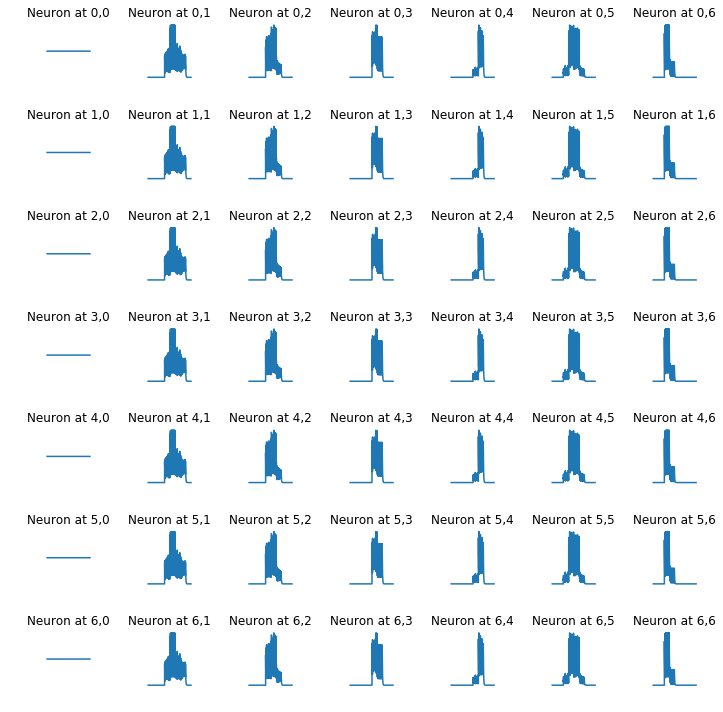

In [47]:
#fig, axes = plt.subplots(ncols=l2_neurons_x, nrows=l2_neurons_y, figsize=(10,10))
fig=plt.figure(figsize=(10,10))
fig.set_tight_layout({5,2,5})

for y in range(l2_neurons_y):
    for x in range(l2_neurons_x):
        index=(y)*l2_neurons_x+x+1
        id = "{}{}{}".format(l2_neurons_y, l2_neurons_x,index)
        a=fig.add_subplot(l2_neurons_y, l2_neurons_x, index)
        a.plot(l2_neurons[y][x].time, l2_neurons[y][x].Vm)
        a.axis('off')
        plt.title('Neuron at {},{}'.format(y,x))
        
plt.show()

In [ ]:
fig = plt.figure() #int(x_max+1) * int(y_max+1))
x_count, y_count = 1, 1

for y in range (0, len_y, stride[0]):
    x_count = 1
    for x in range(0, len_x, stride[0]):
        x_end = x + stride[0]
        y_end = y + stride[0]
        kernel = image_norm[y:y_end, x:x_end]
        #orientation = s1(kernel)
        a = fig.add_subplot(y_max, x_max, (y_count-1)*x_max+x_count)
        a.axis('off')
        plt.imshow(kernel, cmap="gray")    
        x_count += 1
    y_count += 1
plt.show()    

In [ ]:
print (stimulus_layer2[0:400])

Input at 10/10 for neuron L=2/i=0 = [ 0.  0.  0. ...,  0.  0.  0.]


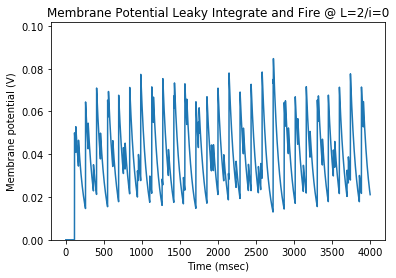

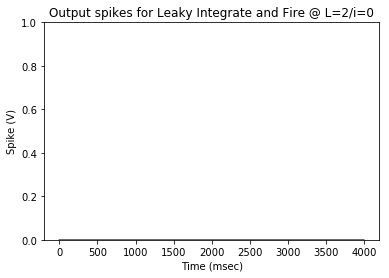

In [22]:
print ('Input at {}/{} for neuron {}/{} = {}'.format(x, y, "L=2","i=0",stimulus_layer2))
neuron2.spike_generator(stimulus_layer2)
graph.plot_membrane_potential(neuron2.time, neuron2.Vm, 'Membrane Potential {}'.format(neuron2.type), neuron_id = "L=2/i=0")
graph.plot_spikes(neuron2.time, neuron2.spikes, 'Output spikes for {}'.format(neuron2.type), neuron_id = "L=2/i=0")

# From SNN_0
Kept here for re-use as / if needed

Sum the spikes from the neurons in the 1st layer (layer=0)

In [175]:
layer = 0 
layer_spikes = np.zeros_like(neurons[layer][0].spikes)
for i in range(num_neurons):
    layer_spikes += neurons[layer][i].spikes    

Get a view of the spikes from the iterations 0 to 200

In [176]:
print (layer_spikes[0:200])

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  2.  3.  0.  1.  0.  0.  3.  2.  2.  2.  3.  0.  1.
  1.  1.  5.  0.  2.  1.  2.  1.  0.  2.  2.  0.  0.  0.  0.  1.  1.  0.
  0.  1.  3.  1.  1.  1.  0.  2.  0.  1.  1.  0.  1.  3.  0.  0.  1.  1.
  2.  1.  1.  0.  1.  1.  1.  0.  1.  2.  0.  0.  1.  0.  0.  1.  0.  0.
  0.  0.  0.  2.  1.  1.  1.  1.  1.  3.  0.  1.  3.  0.  0.  2.  1.  0.
  0.  0.]


Graph summed spike train from first layer. This is the input the neuron 0 on layer 1.


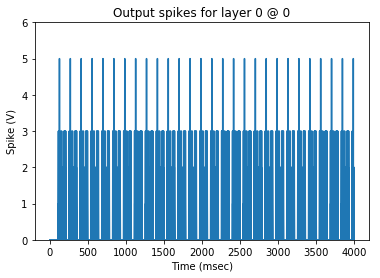

In [177]:
plot_spikes(neurons[0][0].time, layer_spikes, 'Output spikes for layer {}'.format(layer))

### Now simulate spikes propogated to a neuron on the 2nd layer

In [178]:
neurons[1][0]=Neuron(debug=False)             # Re-initialise this neuron in case of multiple runs
neurons[1][0].spike_generator(layer_spikes)   

In [182]:
start_time = 0
end_time = len(neurons[1][0].time)
print('Rendering neurons[1][0] over the time period {}:{}'.format(start_time,end_time))

Rendering neurons[1][0] over the time period 0:4002


### Graph the results

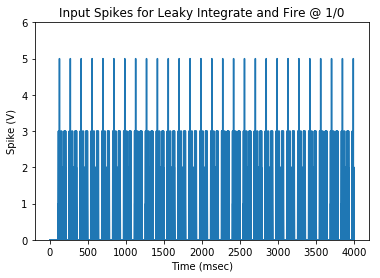

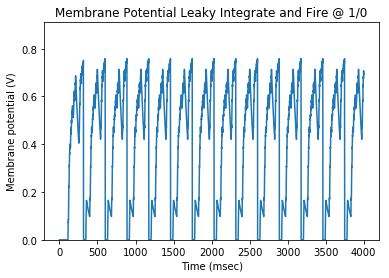

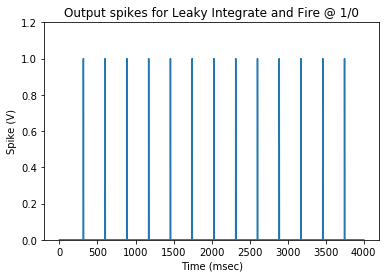

In [187]:
plot_spikes(neurons[0][0].time[start_time:end_time], layer_spikes[start_time:end_time], 
            'Input Spikes for {}'.format(neurons[1][0].type), neuron_id = "1/0")
plot_membrane_potential(neurons[1][0].time[start_time:end_time], neurons[1][0].Vm[start_time:end_time], 
            'Membrane Potential {}'.format(neurons[1][0].type), neuron_id = "1/0")
plot_spikes(neurons[1][0].time[start_time:end_time], neurons[1][0].spikes[start_time:end_time], 
            'Output spikes for {}'.format(neurons[1][0].type), neuron_id = "1/0")

## Findings

The following findings were made:
    
* The model works and it is possible to see spike trains propogate between different layers in an SNN
* Only a simple model using feedforward has been applied here
* Different spike trains are evidenced depending on the offset of the applied stimulus
* There is no real view of biological plausability here, and this code base is unlikely to offer anything in terms of a real use-case
* It has been a useful experience to understand the mechanics of a basic spiking network, and to witness it in action


## Next steps

* Explore other neuron types (Hodkins-Huxley neurons for example)
* Explore how to develop a more complex layered model with feedforward, then with feedback too
* Explore the impact of inhibitory neurons (excitory neurons are modelled above)
* Explore how to integrate this with real stimuli (for example MNIST data)
* Explore how to integrate learning into this multi-layered model

